## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [2]:
import pandas as pd

# load dataframe from CSV file
# YOUR CODE HERE
df = pd.read_csv("https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz")


Il y a 30165 articles


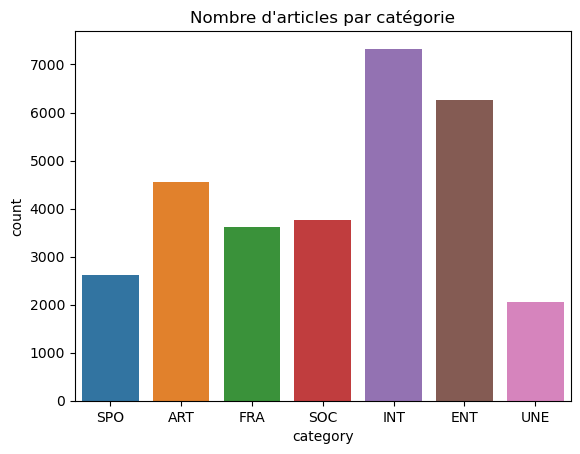

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the statistics of category
# YOUR CODE HERE

print(f"Il y a {len(df)} articles")
sns.countplot(df, x='category')
plt.title("Nombre d'articles par catégorie")
plt.show()

In [14]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE
df.sample(n=3)


,text,category
6715,"les indices boursiers ont progressé jeudi 15 mai malgré la publication d'une série d'indicateurs économiques inquiétants en europe et aux etats-unis les investisseurs ont laissé de côté la conjoncture et se sont concentrés sur les résultats des entreprises a wall street l'indice dow jones des trente premières valeurs industrielles a gagné 0,76 à 8 713,14 points l'indice composite nasdaq riche en valeurs technologiques a progressé de 1,07 à 1 551,38 points les investisseurs ont peu tenu compte des prix à la production d'avril qui ont accusé une chute sans précédent de 1,9 par rapport au mois de mars la baisse de la production industrielle américaine en avril n'a pas non plus pesé sur les indices cette dernière a reculé de 0,5 par rapport à mars et le taux d'utilisation des capacités était en avril de 74,4 au plus bas depuis vingt ans cependant les déclarations encourageantes de sam palmisano pdg du constructeur informatique ibm selon lequel la demande s'est relativement stabilisée dans les hautes technologies ont poussé les actions du secteur à la hausse le titre ibm a progressé de 1,34 à 89,89 dollars les résultats trimestriels de la société de conseil en informatique computer associates ont également rassuré et l'action a bondi de 10,38 à 20,26 dollars a londres l'indice footsie a franchi le seuil des 4 000 points à 4 011,10 points 0,91 malgré l'annonce jeudi de l'entrée en récession de l'allemagne qui enregistre deux trimestres consécutifs de recul de son produit intérieur brut l'indice dax à francfort a gagné 2,17 à 2 989,38 points le cac 40 à paris a progressé de 1,15 à 2 995,98 points l'action du groupe de luxe lvmh a gagné 6,10 la plus forte hausse de l'indice à 42,45 euros devant ses actionnaires réunis en assemblée générale son pdg bernard arnault a maintenu un objectif de croissance sensible du résultat en 2003 a tokyo le nikkei est resté quasi stable à 8 117,29 points 0,08",ENT
9259,"la guerre en irak qui paraît de plus en plus inévitable et les mauvaises nouvelles macroéconomiques qui continuent d'accabler l'allemagne ont pesé sur les indices boursiers jeudi 6 février wall street a accentué sa chute de la veille l'indice dow jones des valeurs industrielles perdant 0,70 à 7 929,30 points et le nasdaq indice composite riche en valeurs technologiques parvenant tout juste à se maintenir à 1 301,73 points 0,02 les places boursières européennes ont en grande partie effacé leurs gains de la veille l'eurostoxx 50 indice des 50 premières capitalisations de la zone euro décrochant de 2,50 à 2 169,88 points l'abaissement surprise des taux directeurs de la banque d'angleterre jeudi à leur plus bas à 3,75 depuis 1955 n'a pas empêché le footsie indice des 100 valeurs vedettes de la city de perdre 2,22 à 3 597,00 points a francfort l'indice dax enregistrait une baisse de 2,82 à 2 649,00 points la publication par le ministère de l'économie et du travail allemand du chiffre des commandes à l'industrie plus mauvais que ne le pensaient les analystes en baisse de 4,1 en volume en décembre 2002 a pesé sur le moral des investisseurs a paris le cac 40 perdait également 1,68 à 2 836,18 points totalfinaelf plus grosse capitalisation de l'indice a fortement pesé sur la séance après l'annonce par son concurrent anglo-néerlandais shell de bénéfices annuels en baisse mis sur le compte de marges en érosion l'action totalfinaelf perdait ainsi 2,60 euros 3,67 à 120,60 euros jeudi le moral n'était guère meilleur sur la place japonaise où vendredi matin l'indice nikkei de la bourse de tokyo clôturait en baisse de 0,42 à 8 448,16 points après la chute de wall street le cours du pétrole a continué à grimper jeudi prouvant à quel point les spéculateurs parient sur le déclenchement de la guerre en irak le prix du brut est passé au-dessus des 34 dollars le baril à new york vendredi matin à paris le cac 40 ouvrait en très légère hausse",ENT
3122,démagogique dépassé effarant les syndicats d'enseignants n'ont pas eu de mots assez sévère

In [16]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------------------------- ------------ 204.8/300.2 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00


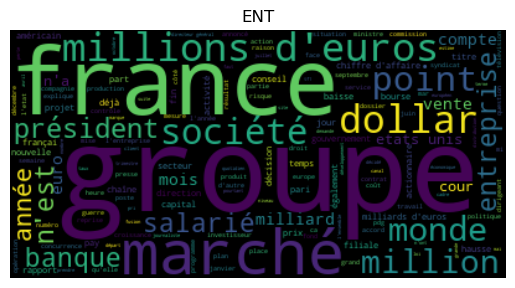

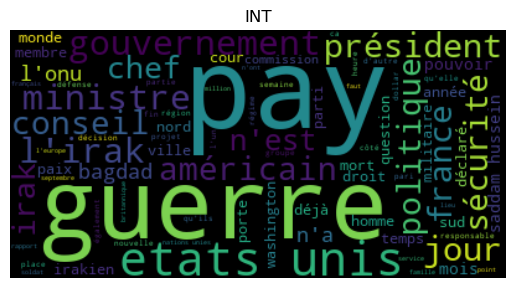

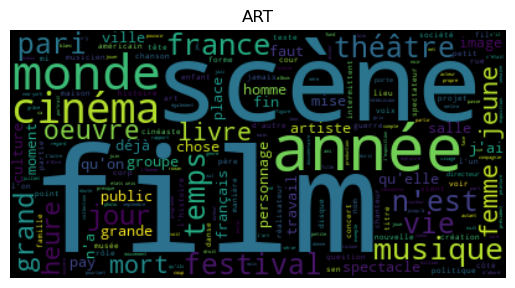

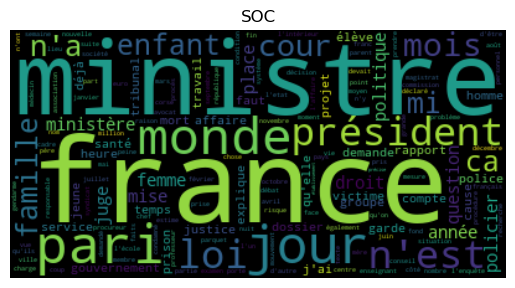

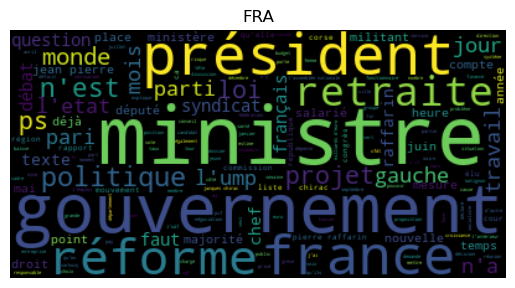

In [21]:
from wordcloud import WordCloud
# Display one wordcloud for each of the most frequent classes

from wordcloud import WordCloud
STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]
import matplotlib.pyplot as plt

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
 # YOUR CODE HERE
    df_cat = df[df['category']==cat]
    text_cat = " ".join(text for text in df_cat['text'])
    wordcloud = WordCloud(stopwords=STOPWORDS).generate(text_cat)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(cat)
    plt.axis("off")
    plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [22]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE
X_train, X_dev_test, y_train, y_dev_test = train_test_split(df['text'], df['category'], test_size=0.2)
X_dev, X_test, y_dev, y_test = train_test_split(X_dev_test, y_dev_test, test_size=0.5)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000)

# fit on train data
vectorizer.fit(X_train)

# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)


In [32]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
clf = MultinomialNB()
# Train 
clf.fit(X_train_counts, y_train)
# Evaluate 
print(f"Train accuracy : {clf.score(X_train_counts, y_train)}")
print(f"Dev accuracy : {clf.score(X_dev_counts, y_dev)}")
print(f"Test accuracy : {clf.score(X_test_counts, y_test)}")


Train accuracy : 0.7294878170064645
Dev accuracy : 0.7307692307692307
Test accuracy : 0.7195889956910838


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE
for mf in [500,1000,5000,10000]:
    vectorizer = CountVectorizer(max_features=mf)

    # fit on train data
    vectorizer.fit(X_train)

    # apply it on train and dev data
    X_train_counts = vectorizer.transform(X_train)
    X_dev_counts = vectorizer.transform(X_dev)
    X_test_counts = vectorizer.transform(X_test)

    tf_transformer = TfidfTransformer().fit(X_train_counts)
    X_train_tf = tf_transformer.transform(X_train_counts)
    X_dev_tf = tf_transformer.transform(X_dev_counts)

    clf = MultinomialNB()
    # Train 
    clf.fit(X_train_tf, y_train)
    # Evaluate 
    print(f"Max feature = {mf} / dev error = {1-clf.score(X_dev_tf, y_dev)}")

Max feature = 500 / dev error = 0.31465517241379315
Max feature = 1000 / dev error = 0.25563660477453576
Max feature = 5000 / dev error = 0.20457559681697612
Max feature = 10000 / dev error = 0.19363395225464186


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?

**Answer**:

> * The classes with the best scores (ART, ENT, INT) are those with the most examples. SPO makes exception, probably because it is easier to classify, it includes more specific terms.
> * The most confused classes are SOC/FRA (because taling about the society is often talking about the french society) and UNE/INT(because international news often make the font page). In general UNE cannot be classified easily because it is not a theme like the others.

              precision    recall  f1-score   support

         ART       0.77      0.88      0.82       484
         ENT       0.76      0.83      0.79       616
         FRA       0.58      0.70      0.63       333
         INT       0.77      0.89      0.82       752
         SOC       0.67      0.59      0.63       369
         SPO       0.95      0.77      0.85       250
         UNE       0.00      0.00      0.00       212

    accuracy                           0.74      3016
   macro avg       0.64      0.66      0.65      3016
weighted avg       0.70      0.74      0.72      3016



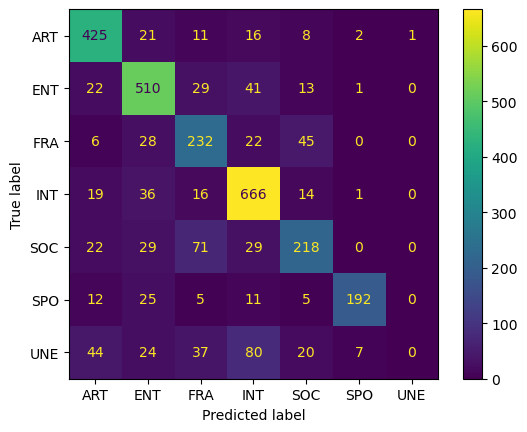

In [28]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# YOUR CODE HERE

print(classification_report(y_dev, clf.predict(X_dev_tf)))
cm = confusion_matrix(y_dev, clf.predict(X_dev_tf))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

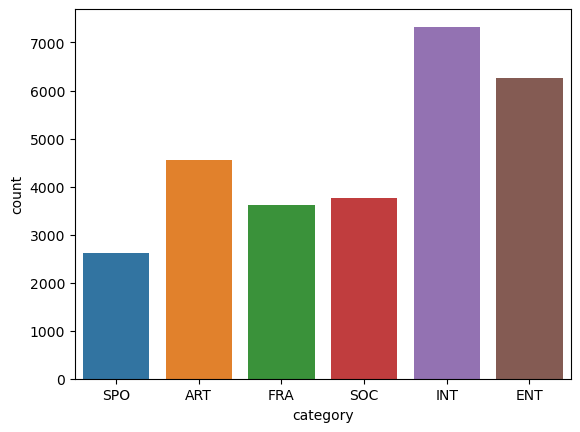

Train size : 22488
Dev size : 2811
Test size : 2811
Max feature = 1000 / dev accuracy = 0.8644610458911419


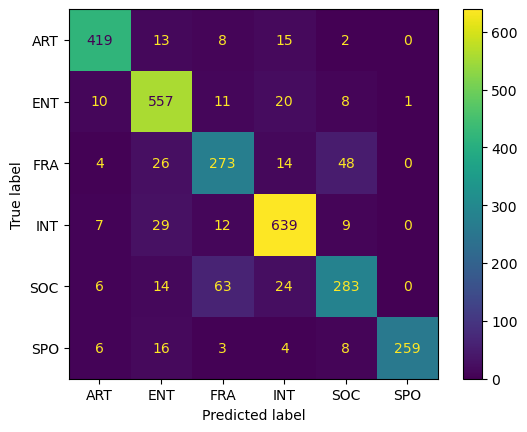

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class

df_filtered = df[df['category'] != 'UNE']

# Plot the statistics of classes

sns.countplot(df_filtered, x='category')
plt.show()

# Make the splits and print the sizes for checking

X_train_f, X_dev_test_f, y_train_f, y_dev_test_f = train_test_split(df_filtered['text'], df_filtered['category'], test_size=0.2)
X_dev_f, X_test_f, y_dev_f, y_test_f = train_test_split(X_dev_test_f, y_dev_test_f, test_size=0.5)
print(f"Train size : {len(y_train_f)}")
print(f"Dev size : {len(y_dev_f)}")
print(f"Test size : {len(y_test_f)}")

# Apply TfidfVectorizer
vectorizer_f = CountVectorizer(max_features=1000)
vectorizer_f.fit(X_train_f)

X_train_counts_f = vectorizer.transform(X_train_f)
X_dev_counts_f = vectorizer.transform(X_dev_f)
X_test_counts_f = vectorizer.transform(X_test_f)

tf_transformer_f = TfidfTransformer().fit(X_train_counts_f)
X_train_tf_f = tf_transformer_f.transform(X_train_counts_f)
X_dev_tf_f = tf_transformer_f.transform(X_dev_counts_f)

# Train MultinomialNB
clf_f = MultinomialNB() 
clf_f.fit(X_train_tf_f, y_train_f)
# Print accuracy
print(f"Max feature = {1000} / dev accuracy = {clf_f.score(X_dev_tf_f, y_dev_f)}")
# Print confusion matric
cm_f = confusion_matrix(y_dev_f, clf_f.predict(X_dev_tf_f))
disp_f = ConfusionMatrixDisplay(confusion_matrix=cm_f, display_labels=clf_f.classes_)
disp_f.plot()
plt.show()

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [43]:
!pip install --upgrade transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/85/f6/c5065913119c41ecad148c34e3a861f719e16b89a522287213698da911fc/transformers-4.37.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/129.4 kB ? eta -:--:--
     ------------------------------------ - 122.9/129.4 kB 3.6 MB/s eta 0:00:01
     ------------------------------------ - 122.9/129.4 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 129.4/129.4 kB 1.3 MB/s eta 0:00:00
  Obtaining dependency information for huggingface-hub<1.0,>=0.19.3 from https://files.pythonhosted.org/packages/28/03/7d3c7153113ec59cfb31e3b8ee773f5f420a0dd7d26d40442542b96675c3/huggingface_hub-0.20.3-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.19,>=0.14 from https://files.pythonhosted.org/packages/c1/02/40725eebedea8175918bd59ab80b2174d6ef3b3ef9ac8ec996e84c38d3ca/tokenizers-0.15.2-cp311-none-win_amd64.whl.metadata
  Obtaining dependency

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2024.2.0 which is incompatible.


In [42]:
import torch
from transformers import pipeline, BartForSequenceClassification, BartTokenizer

# Load BART model and tokenizer
model_name = "facebook/bart-large-mnli"
model = BartForSequenceClassification.from_pretrained(model_name)
tokenizer = BartTokenizer.from_pretrained(model_name)

# Define classes
classes = ["Politics", "Economy", "Sports", "Culture"]

# Define example text from an article in Le Monde
example_text = "The government announced new economic reforms aimed at boosting job creation and reducing unemployment rates."

# Tokenize example text
tokens = tokenizer(example_text, return_tensors="pt")

# Perform zero-shot classification
classifier = pipeline("zero-shot-classification", model=model, tokenizer=tokenizer)
result = classifier(example_text, classes)

# Print results
print("Predicted class:", result["labels"][0])
print("Confidence score:", result["scores"][0])


ImportError: cannot import name 'pipeline' from 'transformers' (c:\Users\PC\anaconda3\Lib\site-packages\transformers\__init__.py)